In [1]:
#Illustration of K-means by example
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
%matplotlib inline

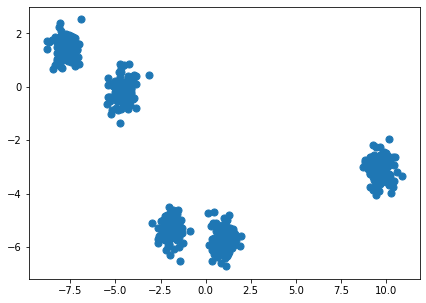

In [32]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=5,
                       cluster_std=0.4)
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
#X= np.array([[1,1.09730308441996],[2,2.43586442272545],[3,2.51116299518401],[4,3.03145539594202],[5,4.66664558877809],[6,3.93408456237042],[7,4.24949659312207],[8,6.20150698271801],[9,6.0717780921866],[10,6.26207315055509],[11,6.49586031797784],[12,7.83670100450654],[13,7.90940408673268],[14,7.64469311768879],[15,8.89462008041086],[16,9.78581223975706],[17,10.4556971391132],[18,9.96049095897342],[19,11.1624287278672],[20,10.4761409095033],[1,1.49645352156891],[2,0.386184701314561],[3,0.342639809355713],[4,-1.05240216629817],[5,-0.701740034637582],[6,-1.80026023417071],[7,-2.65310956496503],[8,-2.22901684720051],[9,-3.89566166009949],[10,-3.01016219363794],[11,-3.94613234180612],[12,-3.8858810837492],[13,-5.33174700485745],[14,-5.80441119639406],[15,-7.08279750222182],[16,-5.82853344603204],[17,-7.15756850228727],[18,-6.87082516687969],[19,-7.59311859408972],[20,-8.78511708923856],[1,3.77667823156857],[2,6.0743178686243],[3,6.76144670933566],[4,9.0193124434231],[5,10.7433356695474],[6,13.7056797616544],[7,16.2995356695637],[8,16.9272746711059],[9,19.1843689223608],[10,21.9390370354661],[11,24.2768927653876],[12,26.5418178220348],[13,27.2271960416962],[14,28.696383257999],[15,31.1041398803967],[16,34.1897421296044],[17,35.6038191352245],[18,37.2067736609178],[19,39.4470247254049],[20,42.1623526714938],[1,-0.664424941363579],[2,-1.78385945533055],[3,-4.84248894780797],[4,-7.18983262066937],[5,-7.61612120451894],[6,-11.4509236493259],[7,-11.9746140324827],[8,-14.2595170068448],[9,-16.9500700011744],[10,-18.3340175444392],[11,-21.4146247097464],[12,-22.8957674212245],[13,-25.2454461975581],[14,-27.5977188400436],[15,-29.1505799048792],[16,-29.5133464245803],[17,-32.4484765820864],[18,-35.3814788479149],[19,-36.1894299953562],[20,-38.118746586956]])
#X

In [7]:
X

array([[ -0.92659806,  -6.93414162],
       [ -1.19864456,  -6.71771373],
       [ -7.80200284,   0.82898619],
       [ -2.29500464,  -9.83466878],
       [ -1.38828556,   6.40613037],
       [ -1.61771636,  -6.89483371],
       [ -1.63278653,  -7.44250351],
       [ -1.82972589,   6.05976377],
       [ -6.84447874,   1.20970665],
       [  2.76631981,   8.98205653],
       [ -1.06819556,  -6.91879689],
       [ -7.00619277,   0.91870337],
       [ -2.9603863 ,  -8.88529915],
       [  2.91073686,   9.06063693],
       [ -1.23324299,  -7.51294435],
       [ -2.98019698,  -9.58418625],
       [ -2.50407157, -10.09342222],
       [ -7.04090894,   1.38728006],
       [ -0.79802639,  -7.31829551],
       [  3.26701267,   9.62015326],
       [ -2.32086429,   6.29214402],
       [ -1.68229825,   6.2863819 ],
       [ -1.79306783,   5.92160863],
       [ -7.64023995,   1.02492136],
       [ -7.04491004,   1.16985505],
       [ -1.74300802,   5.75457115],
       [ -2.66322277,  -9.43233908],
 

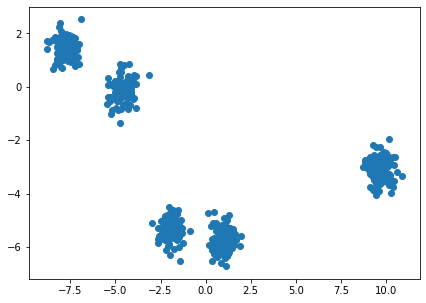

In [33]:
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1]);

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=10000)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[0 2 1 2 0 4 4 1 0 2 2 2 3 2 3 2 3 2 2 4 3 4 3 3 0 2 1 0 0 3 1 0 2 1 4 2 3
 0 1 3 3 0 2 2 3 4 0 1 4 4 4 4 4 3 4 1 0 0 2 0 0 2 4 0 4 3 4 0 4 2 3 1 3 4
 0 4 2 2 2 2 3 0 3 1 0 4 2 1 1 2 4 4 2 0 1 2 2 1 1 0 0 0 2 4 2 4 0 1 1 0 3
 0 2 4 0 4 3 3 2 4 2 3 4 1 3 0 1 2 0 4 2 0 0 3 1 2 1 0 4 2 3 4 3 0 2 1 4 2
 1 1 3 2 4 1 0 2 4 4 1 3 3 2 4 0 4 2 3 3 1 0 0 2 1 1 1 0 3 3 3 0 2 4 4 1 2
 2 1 4 1 2 4 2 1 4 0 1 4 1 2 1 4 1 3 3 2 2 4 1 1 1 1 3 4 0 2 0 3 3 1 2 0 1
 1 3 0 0 1 1 2 1 2 0 4 0 3 2 0 0 0 2 0 4 2 1 3 1 4 3 4 3 1 3 4 2 4 0 2 2 4
 0 3 4 1 2 0 3 1 1 3 4 3 0 3 3 0 0 3 0 3 1 3 1 3 0 4 3 4 1 1 0 4 4 4 3 3 3
 3 4 3 1 4 3 2 2 0 2 3 1 1 0 1 3 2 0 3 3 3 4 4 1 4 1 4 0 0 4 1 0 0 2 1 1 2
 4 0 0 3 3 1 2 4 1 4 1 3 2 2 4 0 0 2 2 1 0 4 2 1 0 4 1 1 0 3 4 2 2 0 3 1 4
 4 0 1 3 1 1 2 3 1 3 4 3 4 0 4 4 1 0 1 2 0 2 4 3 2 3 2 2 3 0 0 1 1 0 0 0 1
 2 0 3 1 3 0 3 4 1 4 1 2 2 3 3 0 2 2 1 1 0 0 2 3 0 3 3 2 4 1 3 0 4 0 2 1 4
 4 2 0 0 2 0 2 4 3 4 0 4 4 4 2 2 1 1 4 1 3 4 4 3 1 4 3 0 4 3 2 3 3 3 3 2 0
 0 2 4 4 1 4 2 1 3 2 4 3 

In [35]:
np.round(X,0)

array([[ 1., -6.],
       [ 9., -4.],
       [-8.,  2.],
       [ 9., -3.],
       [ 1., -6.],
       [-2., -5.],
       [-2., -5.],
       [-7.,  1.],
       [ 2., -6.],
       [ 9., -3.],
       [10., -3.],
       [10., -3.],
       [-4., -1.],
       [ 9., -3.],
       [-5., -0.],
       [ 9., -4.],
       [-5., -0.],
       [ 9., -3.],
       [ 9., -3.],
       [-1., -5.],
       [-4.,  0.],
       [-2., -5.],
       [-5., -0.],
       [-4., -0.],
       [ 2., -6.],
       [11., -3.],
       [-8.,  2.],
       [ 1., -5.],
       [ 1., -6.],
       [-5., -0.],
       [-7.,  1.],
       [ 1., -7.],
       [10., -3.],
       [-7.,  1.],
       [-3., -5.],
       [ 9., -3.],
       [-5., -1.],
       [ 1., -5.],
       [-9.,  2.],
       [-5.,  0.],
       [-5.,  0.],
       [ 1., -6.],
       [ 9., -3.],
       [ 9., -3.],
       [-5.,  0.],
       [-2., -6.],
       [ 1., -5.],
       [-8.,  2.],
       [-2., -5.],
       [-2., -5.],
       [-1., -5.],
       [-2., -5.],
       [-2.,

In [36]:
#?kmeans

In [37]:
X.shape

(500, 2)

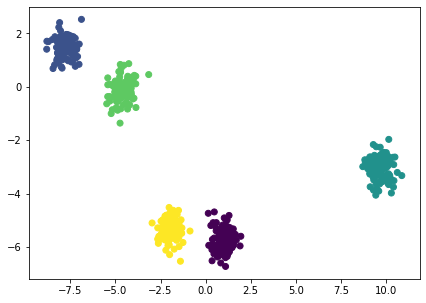

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

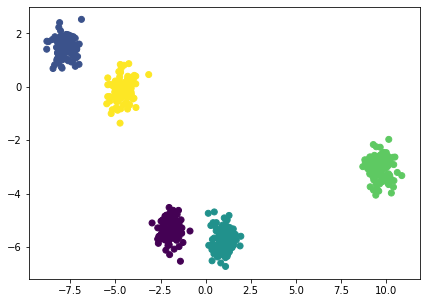

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, max_iter=1, init = 'random')
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

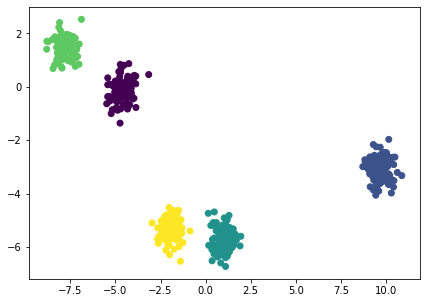

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,max_iter=1000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [54]:
?kmeans

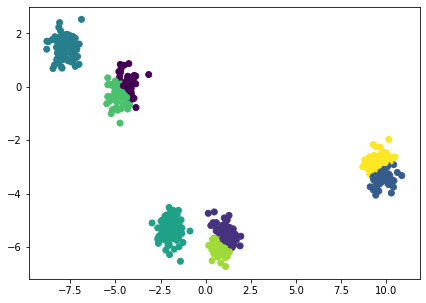

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,max_iter=10000000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

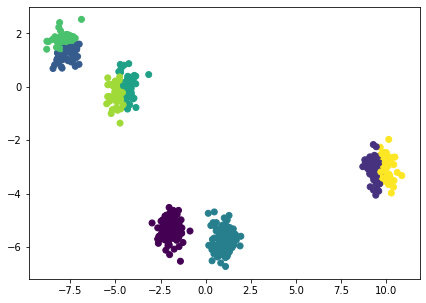

In [73]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8,max_iter=10000000000)
kmeans.fit(X)
labels = kmeans.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X[:,0],X[:,1],c=labels)
plt.show()

In [57]:
kmeans.inertia_

160.60200647076016

In [58]:
kmeans.cluster_centers_

array([[-4.62625426, -0.12249863],
       [ 9.64719019, -3.04858265],
       [ 0.99068061, -5.690993  ],
       [-7.7836123 ,  1.48257142],
       [-1.95001064, -5.34569127]])

In [59]:
kmeansintertia = {}
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10)
    kmeans.fit(X)
    labels=kmeans.predict(X)
    kmeansintertia[k] = kmeans.inertia_ 

In [60]:
kmeansintertia

{2: 8346.064213811473,
 3: 1226.2049021920523,
 4: 598.9469208867711,
 5: 160.60200647076016,
 6: 147.4446052726826,
 7: 136.15707119052854,
 8: 122.03992074317262,
 9: 111.50061109804653,
 10: 106.32840607527574,
 11: 93.10600228963962,
 12: 88.4796009564095,
 13: 79.68720825761268,
 14: 73.77497888737305,
 15: 69.38703083598007,
 16: 64.13351757158165,
 17: 61.67907313607506,
 18: 57.53711531366294,
 19: 54.05624137877367,
 20: 51.61207819215256,
 21: 48.684106658155216,
 22: 46.945321364388214,
 23: 45.50486152205589,
 24: 43.76007539381578,
 25: 41.966290798896765,
 26: 40.07450274098945,
 27: 38.78130911111861,
 28: 38.39668631844053,
 29: 36.41091221671055,
 30: 35.61235095828454,
 31: 34.1932039578863,
 32: 32.6240546625658,
 33: 31.104981821556215,
 34: 30.70300800229148,
 35: 30.12329482483438,
 36: 29.59780019398442,
 37: 28.226963800151623,
 38: 27.224163977766832,
 39: 27.239427345235285,
 40: 26.458047285051695,
 41: 25.434314945630202,
 42: 24.68808680561736,
 43: 23.7191

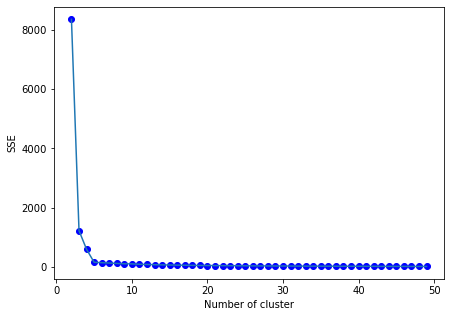

In [61]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(kmeansintertia.keys()), list(kmeansintertia.values()),'bo')
plt.plot(list(kmeansintertia.keys()), list(kmeansintertia.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [113]:
?plt.plot

In [75]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 50):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

In [76]:
labels

array([ 1, 12, 45, 37,  9,  8, 14, 38, 21, 30,  2,  2, 32, 30, 16, 12,  0,
       30, 22, 19, 16, 14, 43,  0, 21, 34, 45,  1, 36,  6, 38, 20, 25, 11,
       18, 22, 24, 40, 42, 16, 16, 20, 22, 30, 16, 26,  1, 17, 31, 14, 19,
       14,  8, 16,  8, 11,  9, 15, 30,  1, 21,  2,  4, 36,  8,  0, 18, 36,
        8, 37, 16, 45,  0, 31, 21, 26, 37, 37, 10, 22, 47, 20,  0, 17, 15,
       26, 46,  5,  5,  2, 19, 35, 22, 36, 27, 22,  2, 45, 27, 20, 21, 21,
       30, 26, 37, 14,  9, 45, 42, 21, 24,  1, 39, 18,  9, 19, 32, 23,  7,
       35, 39, 32, 19, 27, 23, 21, 27, 30, 36, 31, 10, 21, 40,  0,  3, 22,
       29,  1, 14,  7,  0,  8,  0, 20, 37, 17,  8, 46,  3, 27, 24, 46, 26,
       27, 21, 39,  4,  4, 45, 28, 16, 30, 14,  9, 31, 10, 23,  6, 11, 36,
        9, 30, 17,  3, 17, 20, 28, 28, 28, 15, 10, 26, 19, 29,  7, 12, 29,
        4,  3,  7, 18, 25, 29, 18, 21, 17,  8, 27,  2,  3, 19, 17, 24, 32,
        2,  7, 19,  3, 17,  3, 45,  6, 31, 15,  2, 20, 16,  6, 11,  2, 20,
       29, 38, 13, 36,  9

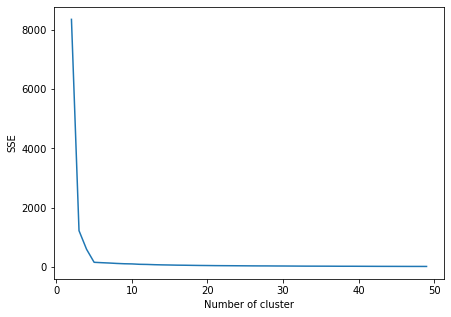

In [77]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [78]:
db

{2: 0.3754282440567633,
 3: 0.33191296752493976,
 4: 0.27101806549128604,
 5: 0.2668891859039582,
 6: 0.6010670608699948,
 7: 0.7934526116243438,
 8: 0.8991481846987835,
 9: 1.0378442370974397,
 10: 0.995254041772025,
 11: 1.0706156836730008,
 12: 1.0136628775635985,
 13: 0.9637285320146518,
 14: 0.9457898394789032,
 15: 0.9193974198948,
 16: 0.889387359293168,
 17: 0.8983030115343927,
 18: 0.8662162164982904,
 19: 0.8689339561671356,
 20: 0.890657003626055,
 21: 0.8715645263661737,
 22: 0.8838826387744565,
 23: 0.8919274748427183,
 24: 0.8955631447741085,
 25: 0.87316815547976,
 26: 0.8856138611585725,
 27: 0.8689478512223537,
 28: 0.8665885500500087,
 29: 0.8795555702204334,
 30: 0.8625712055431018,
 31: 0.8231664550733409,
 32: 0.8513492106190004,
 33: 0.8280549941263584,
 34: 0.8254890065245849,
 35: 0.8403073782593754,
 36: 0.8323533940174129,
 37: 0.8151783866970999,
 38: 0.8308193470102329,
 39: 0.8031104642658952,
 40: 0.8306295794543501,
 41: 0.8009037579085407,
 42: 0.7953728

In [20]:
sse

{2: 13054.613571618434,
 3: 2431.661586962893,
 4: 1236.7253711970088,
 5: 89.79325568605176,
 6: 82.01941984135432,
 7: 74.80544207164364,
 8: 69.4925362317797,
 9: 62.75521328526445,
 10: 57.90479096575302,
 11: 50.8181216029299,
 12: 47.91983778510457,
 13: 43.356541674475324,
 14: 39.13502927250718,
 15: 36.144164757726976,
 16: 34.10921452502269,
 17: 32.72184441357528,
 18: 31.044809249164274,
 19: 29.760240651726022,
 20: 28.0123055822744,
 21: 26.910919543535137,
 22: 25.883166480028677,
 23: 24.33755064569834,
 24: 23.709815885076488,
 25: 22.466504842137482,
 26: 21.736696602656064,
 27: 21.090863220439083,
 28: 20.63249329232111,
 29: 19.821544400535103,
 30: 19.512645157778707,
 31: 18.45954768987155,
 32: 17.874443847753696,
 33: 17.453245987428446,
 34: 16.918939368655224,
 35: 16.538531907526608,
 36: 16.251167036148274,
 37: 15.369938488998924,
 38: 15.184886444053655,
 39: 14.55638701292119,
 40: 14.273100529196618,
 41: 13.732904775165116,
 42: 13.142487242769054,
 43

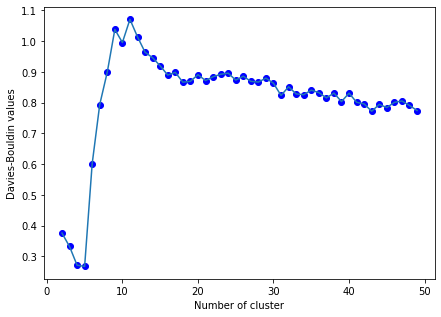

In [79]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

In [25]:
#Accuracy metrics:
# Calculate Silhoutte Score
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.343


In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [27]:
X, Y = load_iris(return_X_y=True)
ind = np.random.permutation(range(len(X)))
X = X[ind]
Y = Y[ind]

In [28]:
X

array([[5.6, 2.8, 4.9, 2. ],
       [6.5, 3. , 5.2, 2. ],
       [4.6, 3.6, 1. , 0.2],
       [5.9, 3. , 5.1, 1.8],
       [4.4, 3.2, 1.3, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [4.6, 3.1, 1.5, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [7.2, 3. , 5.8, 1.6],
       [7.2, 3.2, 6. , 1.8],
       [6.7, 2.5, 5.8, 1.8],
       [7.7, 2.6, 6.9, 2.3],
       [6.1, 2.9, 4.7, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.4, 1.5, 0.4],
       [6.1, 2.8, 4.7, 1.2],
       [6.7, 3.3, 5.7, 2.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.8, 6.7, 2. ],
       [6.3, 2.5, 5. , 1.9],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 2.8, 5.6, 2.1],
       [5.4, 3.9, 1.3, 0.4],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 3.3, 5.7, 2.5],
       [7.4, 2.8, 6.1, 1.9],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3.1, 1.5, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 2

In [29]:
#Deciding Optimal Number of CLusters:
from sklearn.metrics import davies_bouldin_score
sse,db = {}, {}
for k in range(2, 50):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=10000,random_state=10).fit(X)
    labels=kmeans.predict(X)
    sse[k] = kmeans.inertia_ 
    # Inertia: Sum of squared distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(X,labels)

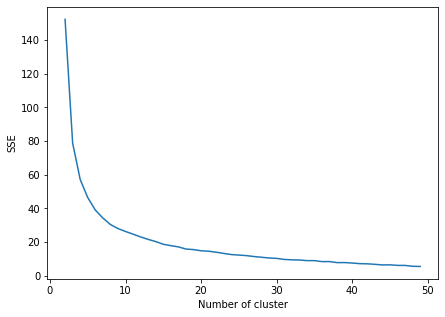

In [30]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

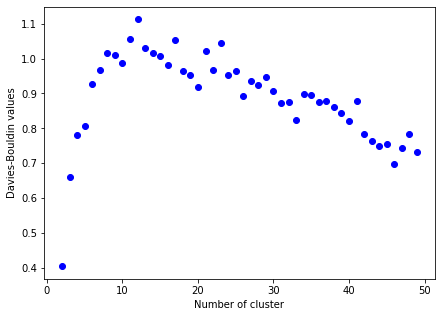

In [31]:
#Davis-Boldin index
plt.figure(figsize=(7,5))
plt.plot(list(db.keys()), list(db.values()), 'bo')
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()